## Multi Output (Branching) Neural Networks
##### In this short jupyter notebook, I will be explaining the details and steps of a basic multi output neural network in a regression style NN. 
##### a Multi Output neural network will generally have more than 1 dense output neuron, and it will have different branches (not all will have branches) these networks will generally produce different outputs. These can be useful in situations where the model will have to predict multiple related tasks, or produce outputs with different features. Keep in mind that branching and multi-output neurons are different things but can correlate to each other.
##### We will first import the necessary libraries


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model

#### We will be using the Energy Efficiency Dataset from UCI Machine Learning Dataset. It uses features such as wall area, roof area, and has 2 outputs (which is why this is multi-output in the first place) Cooling Load, and Heating Load. We can read the data with pandas and plot it. The dataset can cited from here: https://archive.ics.uci.edu/dataset/242/energy+efficiency

In [2]:
data = pd.read_csv('energyefficiency2012.csv')
#display data
data.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Plot Utilities
#### Credit to Laurence Moroney's Code in Coursera's "Tensorflow : Advanced Techniques", I will be using utilities to make give us a better time of plotting the Neural network, and also making it more neat. We will make some functions for that.

In [3]:
#formatting, converts values of columns into numpy arrays
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2

#normalizing function
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

#scatter plot function
def plot_scatter(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

#line plot visualization
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()



### Data Preprocessing, Normalizing, and Splitting
##### Format the dataset for splitting, and split it into a ratio of 80/20

In [4]:
#split the data into train and test using sklearn
train , test = train_test_split(data, test_size=0.2)
train_stats = train.describe() #generate statistics of train dataset

#get Y1 and Y2 as outputs and convert to np arrays
#use pop() to get data out of it
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

#Normalize training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)


### Building the Model and Visualization
##### We can build our jmodel using functional syntax. We can put different layers of our models in variables. We can see that I made another branch at the third dense layer, and have it go through to the y2 output.

In [5]:
#define the model layers
input_layer = Input(shape=(len(train.columns),))
first_dense_layer = Dense(units='128', activation='relu')(input_layer)
second_dense_layer = Dense(units='128', activation='relu')(first_dense_layer)

#create y1 and y2 outputs, with 1 neuron as output
y1_output = Dense(units='1', name='y1_output')(second_dense_layer)
third_dense = Dense(units='64', activation='relu')(second_dense_layer)
y2_output = Dense(units='1', name='y2_output')(third_dense)

#create and define the model variable, then print the
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

### Configure the Parameters and Training the Model
##### Before Training the Model, we can specify the optimizer as well as the loss and metrics for each output. We will train the model for about 400 epochs. I will also print out the validation(test) epoch output

In [9]:
#specify the optimizer and compile loss funtions for both outputs
#use stocastic gradient descent for the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

#Train the model
history = model.fit(norm_train_X, train_Y, epochs=400, batch_size=10, validation_data=(norm_test_X, test_Y))


Epoch 1/400
62/62 [==============================] - 1s 7ms/step - loss: 255.8551 - y1_output_loss: 120.2530 - y2_output_loss: 135.6022 - y1_output_root_mean_squared_error: 10.9660 - y2_output_root_mean_squared_error: 11.6448 - val_loss: 73.2050 - val_y1_output_loss: 21.1055 - val_y2_output_loss: 52.0995 - val_y1_output_root_mean_squared_error: 4.5941 - val_y2_output_root_mean_squared_error: 7.2180
Epoch 2/400
62/62 [==============================] - 0s 3ms/step - loss: 33.2850 - y1_output_loss: 12.7431 - y2_output_loss: 20.5418 - y1_output_root_mean_squared_error: 3.5698 - y2_output_root_mean_squared_error: 4.5323 - val_loss: 20.0725 - val_y1_output_loss: 10.2904 - val_y2_output_loss: 9.7821 - val_y1_output_root_mean_squared_error: 3.2079 - val_y2_output_root_mean_squared_error: 3.1276
Epoch 3/400
62/62 [==============================] - 0s 3ms/step - loss: 32.3781 - y1_output_loss: 11.4048 - y2_output_loss: 20.9733 - y1_output_root_mean_squared_error: 3.3771 - y2_output_root_mean_squ

### Plotting the model
##### Here we can use our plot_scatter function to plot a scatterplot.


In [10]:
Y_pred = model.predict(norm_test_X)

5/5 [==============================] - 0s 2ms/step


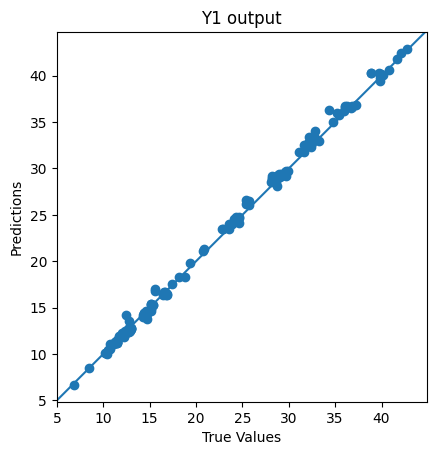

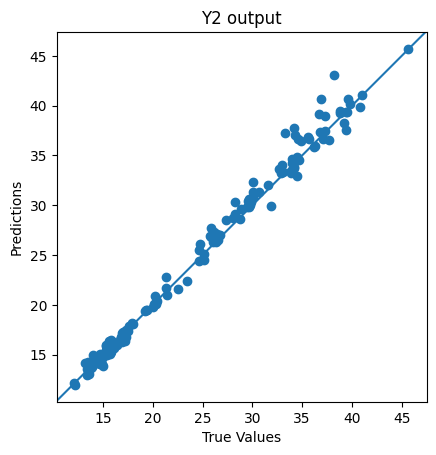

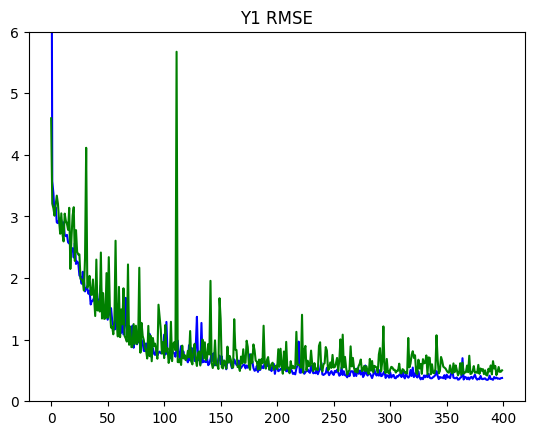

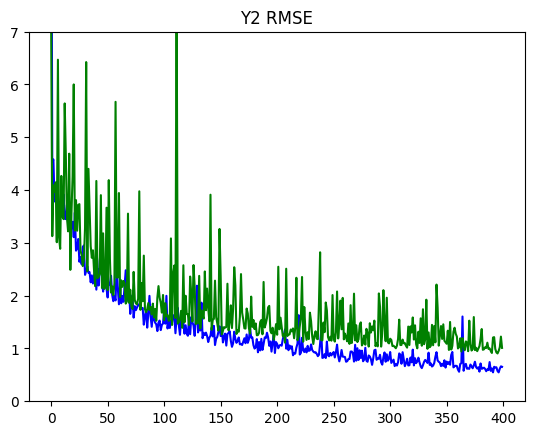

In [12]:
plot_scatter(test_Y[0], Y_pred[0], title='Y1 output')
plot_scatter(test_Y[1], Y_pred[1], title='Y2 output')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)

### Evaluating the Model
##### Here we test the models and print the loss function to get a good idea of how this performed

In [13]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 1.2741 - y1_output_loss: 0.2525 - y2_output_loss: 1.0216 - y1_output_root_mean_squared_error: 0.5025 - y2_output_root_mean_squared_error: 1.0107
Loss = 1.2741237878799438, Y1_loss = 0.2525407373905182, Y1_mse = 0.5025343298912048, Y2_loss = 1.021583080291748, Y2_mse = 1.010733962059021


### Improving our Model - Model B
#### In these last notebook cells, I've tried improving the model by making changes such as Tuning different hyperparameters, Adjusting the architecture, adding dropout layers, increasing more dense layers, and so on and so forth. 
#### I've changed the optimizer to adam to get a different perspective, Added dropout layers to prevent overfitting, Batchnormalzation can improve training speed and give higher learning rates

In [15]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
#defining the 2nd model
input_layerB = Input(shape=(len(train.columns),))
first_dense_layerB = Dense(units=256, activation='relu')(input_layerB)
dropout_layer = Dropout(0.5)(first_dense_layerB)
second_dense_layerB = Dense(units=128, activation='relu')(dropout_layer)
#added batch normalization
batch_norm_layer = BatchNormalization()(second_dense_layerB)

# Create y1 and y2 outputs, with 1 neuron as output
y1_outputB = Dense(units=1, name='y1_outputB')(batch_norm_layer)
third_denseB = Dense(units=64, activation='relu')(batch_norm_layer)
y2_outputB = Dense(units=1, name='y2_outputB')(third_denseB)

# Create and define the model variable
modelB = Model(inputs=input_layerB, outputs=[y1_outputB, y2_outputB])

print(modelB.summary())




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 256)          2304        ['input_3[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 256)          0           ['dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 128)          32896       ['dropout_1[0][0]']              
                                                                                            

In [17]:
# Compile the model and train it
modelB.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
history = modelB.fit(norm_train_X, train_Y,
                    epochs=400, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/400
62/62 [==============================] - 2s 7ms/step - loss: 956.6808 - y1_outputB_loss: 526.3342 - y2_outputB_loss: 430.3465 - y1_outputB_mae: 21.8970 - y1_outputB_mse: 526.3342 - y2_outputB_mae: 19.0066 - y2_outputB_mse: 430.3465 - val_loss: 782.7354 - val_y1_outputB_loss: 492.1978 - val_y2_outputB_loss: 290.5376 - val_y1_outputB_mae: 21.2328 - val_y1_outputB_mse: 492.1978 - val_y2_outputB_mae: 16.3922 - val_y2_outputB_mse: 290.5376
Epoch 2/400
62/62 [==============================] - 0s 3ms/step - loss: 563.1066 - y1_outputB_loss: 447.2335 - y2_outputB_loss: 115.8731 - y1_outputB_mae: 20.5546 - y1_outputB_mse: 447.2335 - y2_outputB_mae: 8.6743 - y2_outputB_mse: 115.8731 - val_loss: 581.5242 - val_y1_outputB_loss: 423.9603 - val_y2_outputB_loss: 157.5638 - val_y1_outputB_mae: 20.0064 - val_y1_outputB_mse: 423.9603 - val_y2_outputB_mae: 11.5644 - val_y2_outputB_mse: 157.5638
Epoch 3/400
62/62 [==============================] - 0s 3ms/step - loss: 443.7823 - y1_outputB_loss

### Evaluate the new model
##### So we produced our loss as: loss: 9.9834  and val_loss: 1.4488 over 400 epochs for the new model
##### Compare that to the first model: loss: 0.5695 and  val_loss: 1.2741, the first model performed better. This maybe due to having more dense neurons (256) in the newer model and lead to overfitting. The training duration is also way longer due to a more complex model.

In [19]:
modelB.evaluate(x=norm_test_X, y=test_Y)

1/5 [=====>........................] - ETA: 0s - loss: 1.9075 - y1_outputB_loss: 0.4111 - y2_outputB_loss: 1.4964 - y1_outputB_mae: 0.4851 - y1_outputB_mse: 0.4111 - y2_outputB_mae: 0.9070 - y2_outputB_mse: 1.4964

5/5 [==============================] - 0s 6ms/step - loss: 1.4488 - y1_outputB_loss: 0.4720 - y2_outputB_loss: 0.9768 - y1_outputB_mae: 0.5219 - y1_outputB_mse: 0.4720 - y2_outputB_mae: 0.7289 - y2_outputB_mse: 0.9768


[1.4488390684127808,
 0.4720335602760315,
 0.976805567741394,
 0.5218974351882935,
 0.4720335602760315,
 0.7289391160011292,
 0.976805567741394]